# Adjust image brightness and contrast

Fix poorly lit images or enhance visibility by adjusting brightness, contrast, and color saturation.

**What's in this recipe:**
- Adjust brightness, contrast, and saturation
- Test adjustments before applying
- Process multiple images in batch


## Problem

Images from different sources have inconsistent lighting:

- Underexposed (too dark)
- Overexposed (washed out)
- Low contrast (muddy appearance)
- Dull colors (low saturation)

Manually adjusting each image is tedious and doesn't scale.


## Solution

**Without Pixeltable:** Write a loop to adjust images with Pillow's `ImageEnhance` (or similar tools), manage file paths and results yourself.

**With Pixeltable:** Use Pillow's `ImageEnhance` in Pixeltable UDFs. Test adjustments, then apply to all images with automatic tracking.

### Setup


In [ ]:
%pip install -qU pixeltable

In [1]:
import pixeltable as pxt
from PIL import ImageEnhance

In [2]:
# Create a fresh directory (drop existing if present)
pxt.drop_dir('image_demo', force=True)
pxt.create_dir('image_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/alison-pxt/.pixeltable/pgdata
Created directory 'image_demo'.


### Load images


In [3]:
t = pxt.create_table('image_demo.enhancements', {'image': pxt.Image})
t.insert([
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000001.jpg'},
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000016.jpg'},
])

Created table 'enhancements'.
Inserting rows into `enhancements`: 2 rows [00:00, 677.48 rows/s]
Inserted 2 rows with 0 errors.


2 rows inserted, 4 values computed.

### Define enhancement UDFs


In [4]:
@pxt.udf
def adjust_brightness(img: pxt.Image, factor: float) -> pxt.Image:
    """Adjust brightness. factor < 1 = darker, > 1 = brighter."""
    return ImageEnhance.Brightness(img).enhance(factor)

@pxt.udf
def adjust_contrast(img: pxt.Image, factor: float) -> pxt.Image:
    """Adjust contrast. factor < 1 = lower, > 1 = higher."""
    return ImageEnhance.Contrast(img).enhance(factor)

@pxt.udf
def adjust_saturation(img: pxt.Image, factor: float) -> pxt.Image:
    """Adjust saturation. factor < 1 = less saturated, > 1 = more saturated."""
    return ImageEnhance.Color(img).enhance(factor)

### Test adjustments

Preview different enhancement levels on one image.


image,adjust_brightness,adjust_brightness_1
,,

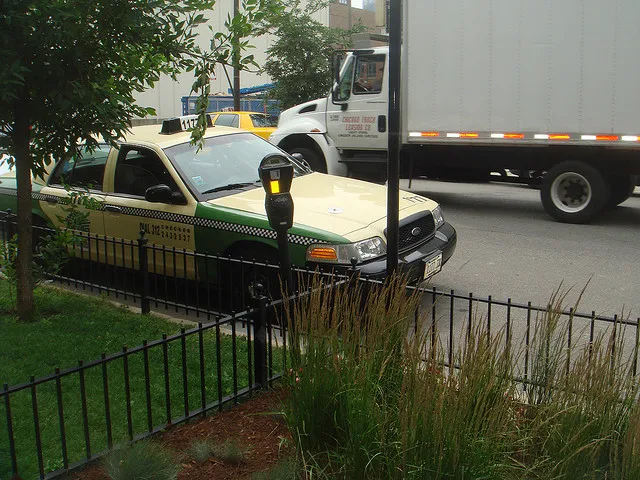
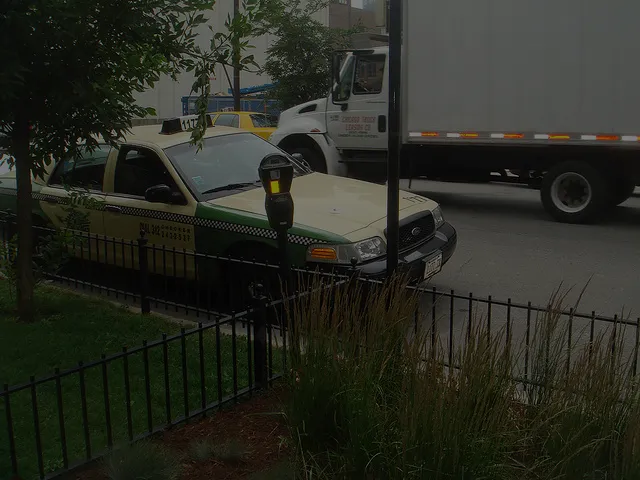
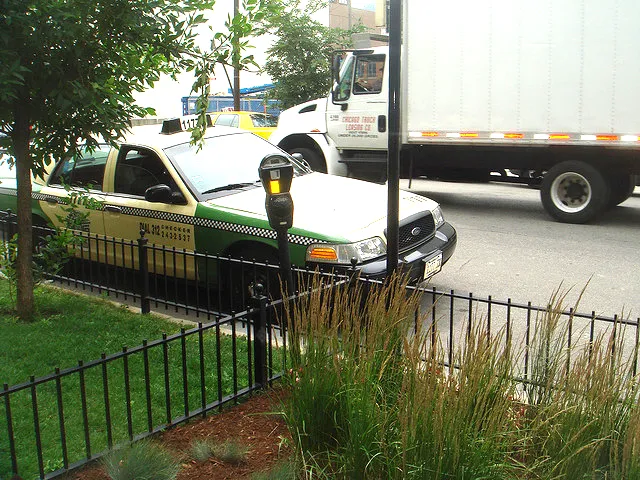

In [5]:
# Test brightness adjustments
t.select(
    t.image,
    adjust_brightness(t.image, 0.5),
    adjust_brightness(t.image, 1.5)
).head(1)

### Apply to all images

Add enhancement columns for comparison.


In [6]:
# Brightness adjustments (1.0 = original)
t.add_computed_column(darker=adjust_brightness(t.image, 0.5))
t.add_computed_column(brighter=adjust_brightness(t.image, 1.5))

# Contrast adjustments
t.add_computed_column(low_contrast=adjust_contrast(t.image, 0.5))
t.add_computed_column(high_contrast=adjust_contrast(t.image, 2.0))

# Color saturation
t.add_computed_column(desaturated=adjust_saturation(t.image, 0.3))
t.add_computed_column(saturated=adjust_saturation(t.image, 2.0))

Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.


2 rows updated, 2 values computed.

### View results

Compare different enhancement levels side-by-side.


image,desaturated,saturated
,,
,,

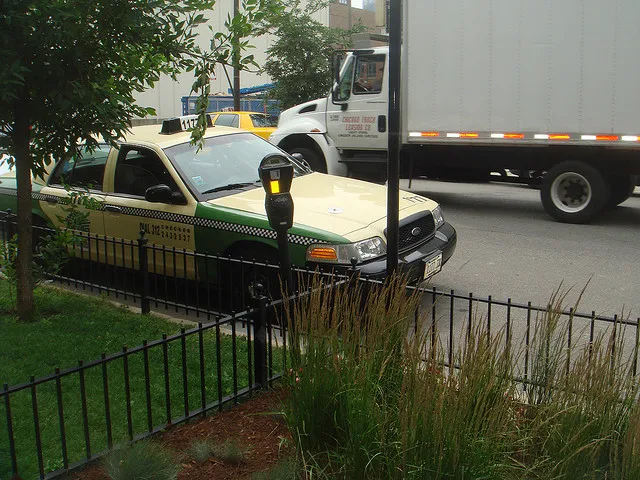
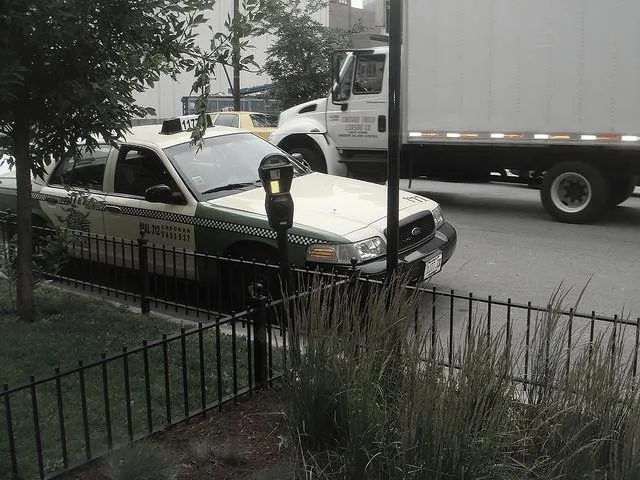
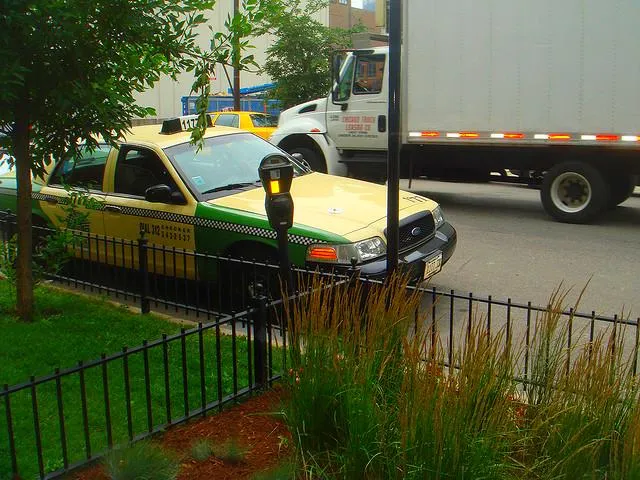
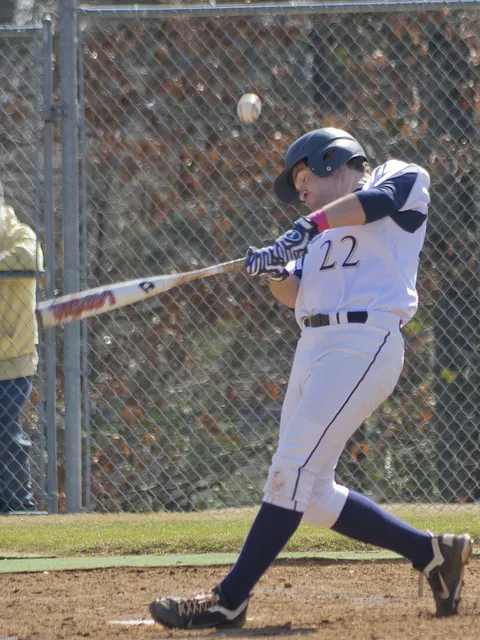
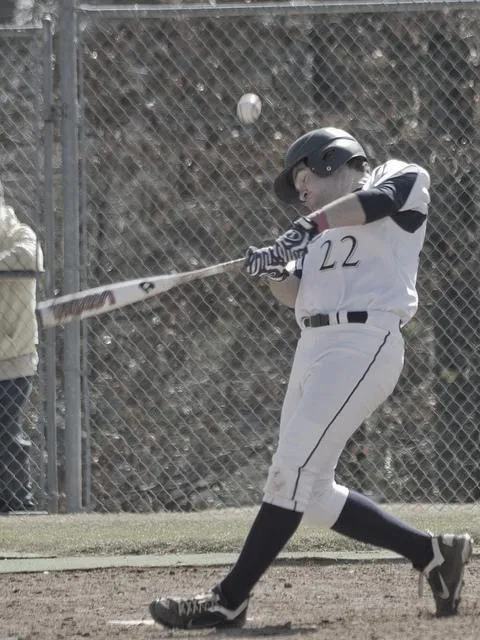
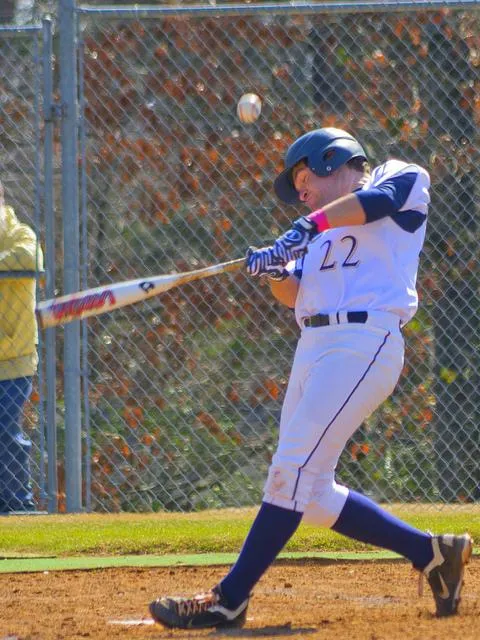

In [7]:
# Compare brightness levels
t.select(t.image, t.darker, t.brighter).show()

# Compare contrast levels
t.select(t.image, t.low_contrast, t.high_contrast).show()

# Compare saturation levels
t.select(t.image, t.desaturated, t.saturated).show()

## Explanation

**How it works:**
- Use PIL's `ImageEnhance` module for brightness, contrast, and color adjustments
- Factor of 1.0 = original, < 1.0 = decrease, > 1.0 = increase

**Workflow:**
1. Define UDFs for each enhancement type
2. Test with `.select().head()` to preview adjustments
3. Add as computed columns to apply to all images

**Common adjustments:**
- Brightness: 0.5 (darker), 1.5 (brighter)
- Contrast: 0.5 (lower), 2.0 (higher)
- Saturation: 0.3 (desaturated), 2.0 (saturated)


## See also

- [Test transformations with fast feedback loops](../iteration/fast-feedback-loops.ipynb)
- [Apply image filters](./image-filters.ipynb)
- *Pillow techniques from [Real Python: Image Processing With the Python Pillow Library](https://realpython.com/image-processing-with-the-python-pillow-library/)*
